In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.core.pylabtools import figsize
from random import sample
from random import uniform
from matplotlib import pyplot as plt

# The Birthday Problem

A big league team has 40 people on its roster.  
Assume that all birthdays are equally likely. And, assume no one on the team was born on February 29th.  
**What is the probability that there are at least two people with the same birthday?**


### Use an experiment to make a guess at the probability of at least two people with the same birthday.

In [3]:
def bdaySimulation(group_size):
    # Assume no one in the group was born on February 29th
    # Thus, there are 365 days
    bday_list = list(range(365)) 
    group_bday_list = [sample(bday_list, 1)[0] for i in range(group_size)]
    group_bday_set = set(group_bday_list)
    # if the length of group_bday_set is less than the group size,
    # then at least two players share the same birthday
    if len(group_bday_set) < group_size:
        return 1
    else:
        return 0

The concept of the simulation function above goes like this:  
    
1) Generate a list from 0 to 364, representing 365 days.  
    
2) Get one sample from the list n times. In this case, we draw a number from the list 40 times since the group size is 40. All the drawn sample go to a list.  
    
3) Apply Python's set() function to the list. If there are identical elements in the list, the size of the set will decrease.  
    
4) Compare the length of the set to the group size. If the length of the set is less than the group size, we will say, in this simulation, there are at least two players sharing the same birthday.

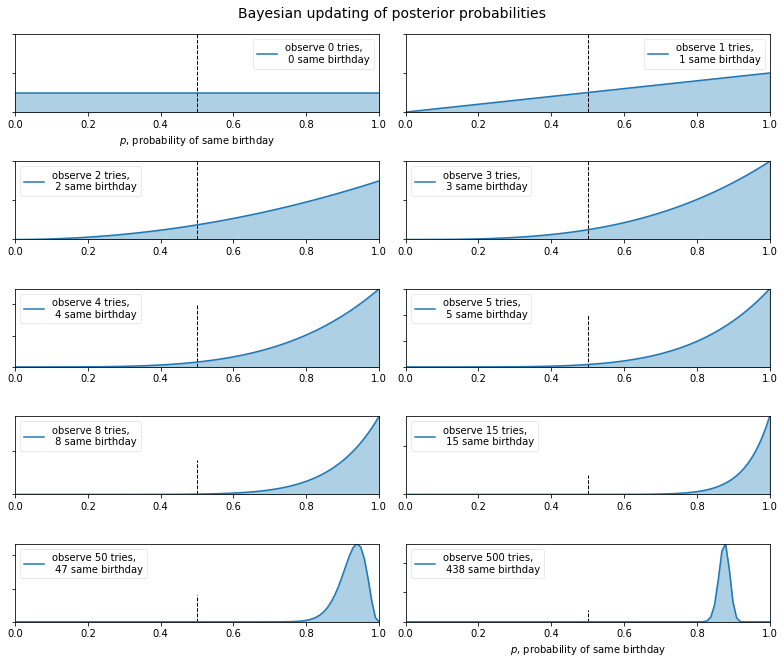

In [4]:
figsize(11, 9)

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = np.array([bdaySimulation(40) for i in range(n_trials[-1])])
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of same birthday") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    samebday = data[:N].sum()
    y = dist.pdf(x, 1 + samebday, 1 + N - samebday)
    plt.plot(x, y, label="observe %d tries,\n %d same birthday" % (N, samebday))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

After 500 simulations, 438 cases have at least two players sharing the same birthday in a group size of 40.  
Therefore, for this simulation, the probability of having at least two players sharing the same birthday is 0.876.

### So, what is the minimum size of group required for there to get the probability over .500?

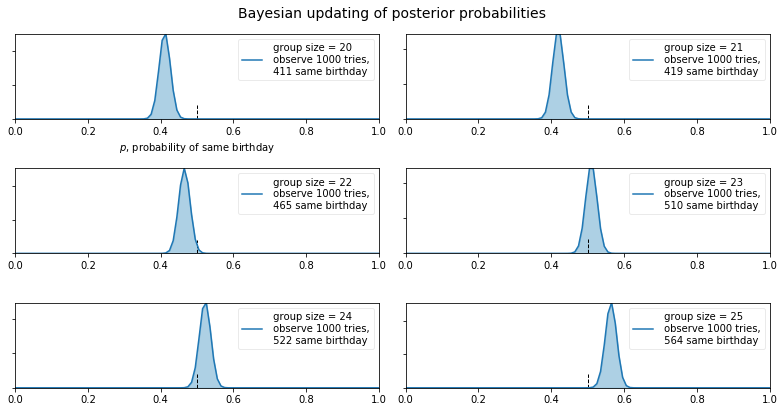

In [5]:
figsize(11, 9)

dist = stats.beta
n_list = list(range(20,26))
# Run 1000 simulations for each team size
data = np.array([[bdaySimulation(num) for i in range(1000)] for num in n_list])
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_list):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of same birthday") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    samebday = data[N-20].sum()
    y = dist.pdf(x, 1 + samebday, 1 + 1000 - samebday)
    plt.plot(x, y, label=" group size = %d \n observe %d tries,\n %d same birthday" % (N, 1000, samebday))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

Based on the histograms above, after 1000 simulations, the minimum size of group required for there to be a probability of 0.50 or higher of having two players with the same birthday appears to be 23.